Exploratory Data Analysis is only done for a smaller sample of the full dataset (ml-latest-small), due to computing and time constraints

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
PROJECT_DIR = "/content/drive/My Drive/Project_EnsembleLearning/"

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_ratings = pd.read_csv(PROJECT_DIR + "dataset/ratings.csv")
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
df_movies = pd.read_csv(PROJECT_DIR + "dataset/movies.csv")
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
df_movies_by_genre = pd.DataFrame()

for index, row in df_movies.iterrows():
    dict_movie = {
      "movieId": row['movieId'],
      "title": row['title'],
      "Action": False,
      "Adventure": False,
      "Animation": False,
      "Children": False,
      "Comedy": False,
      "Crime": False,
      "Documentary": False,
      "Drama": False,
      "Fantasy": False,
      "Film-Noir": False,
      "Horror": False,
      "IMAX":False,
      "Musical": False,
      "Mystery": False,
      "Romance": False,
      "Sci-Fi": False,
      "Thriller": False,
      "War": False,
      "Western": False 
    }
    
    genres = row['genres'].split("|")
    if "(no genres listed)" not in genres:
        for genre in genres:
            dict_movie[genre] = True
    
    df_movies_by_genre = df_movies_by_genre.append(dict_movie, ignore_index=True)

In [7]:
df_data = df_ratings.merge(df_movies_by_genre,  on='movieId')
df_data.head()

,userId,movieId,rating,timestamp,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,title
0,1,1,4.0,964982703,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Toy Story (1995)
1,5,1,4.0,847434962,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Toy Story (1995)
2,7,1,4.5,1106635946,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Toy Story (1995)
3,15,1,2.5,1510577970,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Toy Story (1995)
4,17,1,4.5,1305696483,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Toy Story (1995)


In [8]:
df_data.shape

(100836, 24)

In [9]:
df_data.info

<bound method DataFrame.info of         userId  movieId  rating  ...  War  Western                             title
0            1        1     4.0  ...  0.0      0.0                  Toy Story (1995)
1            5        1     4.0  ...  0.0      0.0                  Toy Story (1995)
2            7        1     4.5  ...  0.0      0.0                  Toy Story (1995)
3           15        1     2.5  ...  0.0      0.0                  Toy Story (1995)
4           17        1     4.5  ...  0.0      0.0                  Toy Story (1995)
...        ...      ...     ...  ...  ...      ...                               ...
100831     610   160341     2.5  ...  0.0      0.0                  Bloodmoon (1997)
100832     610   160527     4.5  ...  0.0      0.0  Sympathy for the Underdog (1971)
100833     610   160836     3.0  ...  0.0      0.0                     Hazard (2005)
100834     610   163937     3.5  ...  0.0      0.0                Blair Witch (2016)
100835     610   163981     3.5  

In [10]:
# USERS
df_data.userId.unique()

array([  1,   5,   7,  15,  17,  18,  19,  21,  27,  31,  32,  33,  40,
        43,  44,  45,  46,  50,  54,  57,  63,  64,  66,  68,  71,  73,
        76,  78,  82,  86,  89,  90,  91,  93,  96,  98, 103, 107, 112,
       119, 121, 124, 130, 132, 134, 135, 137, 140, 141, 144, 145, 151,
       153, 155, 156, 159, 160, 161, 166, 167, 169, 171, 177, 178, 179,
       182, 185, 186, 191, 193, 200, 201, 202, 206, 213, 214, 216, 217,
       219, 220, 223, 226, 229, 232, 233, 234, 239, 240, 247, 249, 252,
       254, 263, 264, 266, 269, 270, 273, 274, 275, 276, 277, 279, 280,
       282, 283, 288, 290, 291, 292, 293, 298, 304, 307, 314, 322, 323,
       328, 330, 332, 334, 336, 337, 339, 341, 347, 350, 353, 357, 359,
       364, 367, 372, 373, 378, 380, 381, 382, 385, 389, 391, 396, 399,
       401, 411, 412, 414, 420, 422, 432, 434, 436, 438, 443, 448, 451,
       453, 456, 460, 462, 468, 469, 470, 471, 474, 476, 477, 480, 483,
       484, 488, 490, 492, 500, 504, 509, 514, 517, 522, 524, 52

In [11]:
df_data.userId.value_counts()

414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
406      20
595      20
569      20
431      20
442      20
Name: userId, Length: 610, dtype: int64

In [12]:
# MOVIES
df_data.movieId.unique()

array([     1,      3,      6, ..., 160836, 163937, 163981])

In [13]:
df_data.movieId.value_counts()

356       329
318       317
296       307
593       279
2571      278
         ... 
5986        1
100304      1
34800       1
83976       1
8196        1
Name: movieId, Length: 9724, dtype: int64

In [14]:
# RATINGS
df_data.rating.unique()

array([4. , 4.5, 2.5, 3.5, 3. , 5. , 0.5, 2. , 1.5, 1. ])

In [15]:
df_data.rating.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

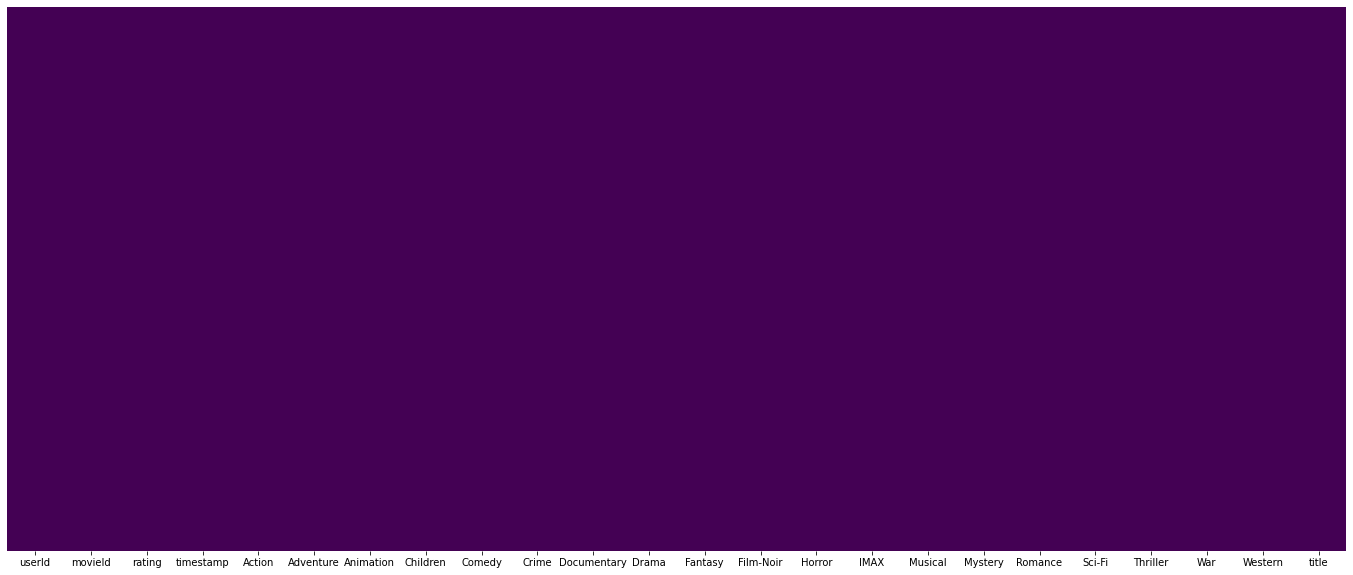

In [16]:
# MISSING VALUES

plt.figure(figsize=(24,10))
sns.heatmap(df_data.isna(), cbar=False, yticklabels=False, cmap='viridis')

# No missing values in the data set

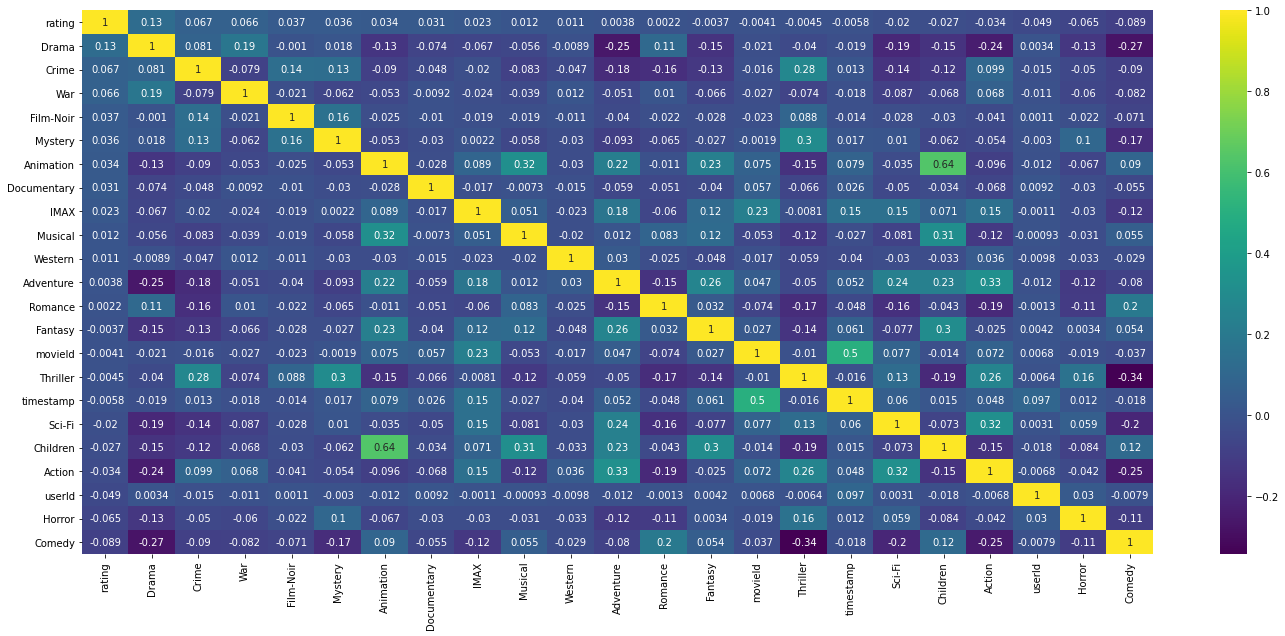

In [17]:
# QUALITY CORRELATION MATRIX

dimensions = 24 
cols = df_data.corr(method ='pearson').nlargest(dimensions, 'rating')['rating'].index

cm = df_data[cols].corr()
plt.figure(figsize=(24,10))

sns.heatmap(cm, annot=True, cmap = 'viridis')

# "rating" has very little or almost no correlation with other columns.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

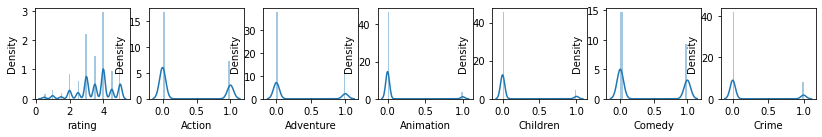

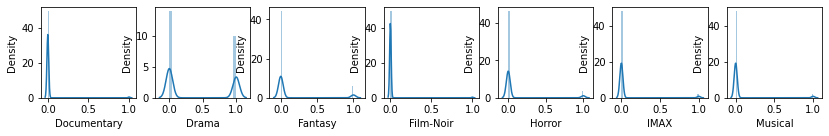

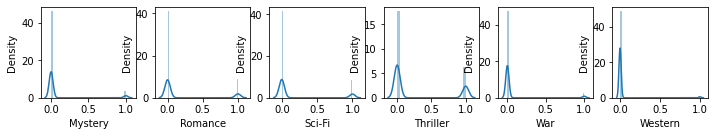

In [18]:
# DISTRIBUTION

l = df_data.select_dtypes(include=np.number).columns[2:10]
index = np.in1d(l, 'timestamp').nonzero()[0]
l = np.delete(l, index)

number_of_columns = l.size
number_of_rows = len(l)-1 / number_of_columns

plt.figure(figsize=(number_of_columns * 2, 2 * number_of_rows))

for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns, i+1)
    sns.distplot(df_data[l[i]],kde=True)
    
l = df_data.columns.values[10:17] 
plt.figure(figsize=(number_of_columns * 2, 2 * number_of_rows))

for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns, i+1)
    sns.distplot(df_data[l[i]],kde=True)

l = df_data.select_dtypes(include=np.number).columns[17:]
plt.figure(figsize=(number_of_columns * 2, 2 * number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns, i+1)
    sns.distplot(df_data[l[i]],kde=True)
    
# None of columns appears to be normally distributed
# All are independent variables positively skewed